# breast cancer dataset

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score,confusion_matrix,classification_report

In [2]:
bc_df = pd.read_csv("C:/Users/USER/Desktop/happy_monk/cancer_classification.csv")

In [3]:
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
bc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
#visualization

C:\Users\USER\anaconda3\envs\Keras\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

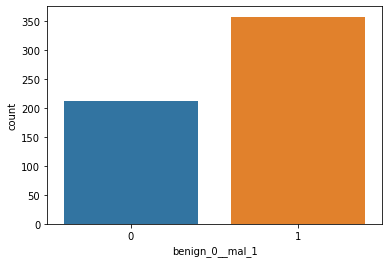

In [9]:
sns.countplot(bc_df['benign_0__mal_1'])

<AxesSubplot:>

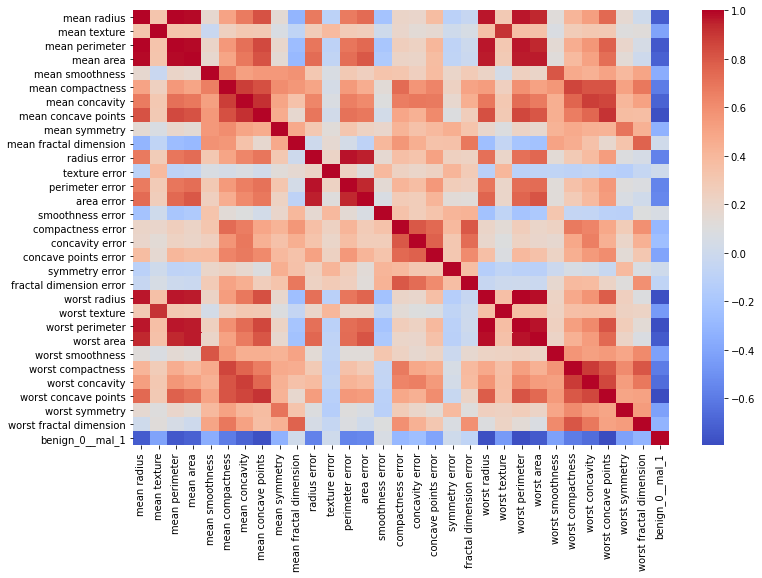

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(bc_df.corr(),cmap='coolwarm')

In [14]:
bc_df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

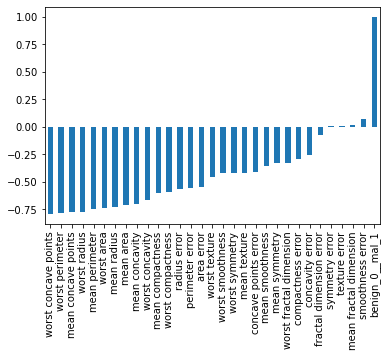

In [15]:
bc_df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

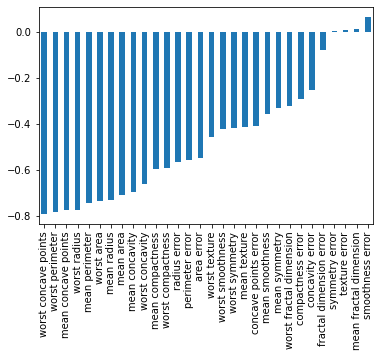

In [17]:
bc_df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [18]:
#get the x and y values

In [20]:
X = bc_df.drop(['benign_0__mal_1'],axis=1).values
y = bc_df['benign_0__mal_1'].values

In [21]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [22]:
X_train.shape,X_test.shape

((426, 30), (143, 30))

In [23]:
#scaling the data

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(X_train)

MinMaxScaler()

In [27]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
#create sequential model

In [30]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

In [32]:
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),verbose=1)

Epoch 1/300
14/14 [==============================] - 5s 121ms/step - loss: 0.6989 - accuracy: 0.6506 - val_loss: 0.6481 - val_accuracy: 0.6224
Epoch 2/300
14/14 [==============================] - 0s 9ms/step - loss: 0.6280 - accuracy: 0.6929 - val_loss: 0.5857 - val_accuracy: 0.8741
Epoch 3/300
14/14 [==============================] - 0s 9ms/step - loss: 0.5705 - accuracy: 0.8639 - val_loss: 0.5296 - val_accuracy: 0.8741
Epoch 4/300
14/14 [==============================] - 0s 11ms/step - loss: 0.5158 - accuracy: 0.8624 - val_loss: 0.4776 - val_accuracy: 0.8951
Epoch 5/300
14/14 [==============================] - 0s 9ms/step - loss: 0.4719 - accuracy: 0.8932 - val_loss: 0.4315 - val_accuracy: 0.9301
Epoch 6/300
14/14 [==============================] - 0s 10ms/step - loss: 0.4108 - accuracy: 0.9035 - val_loss: 0.3889 - val_accuracy: 0.9301
Epoch 7/300
14/14 [==============================] - 0s 9ms/step - loss: 0.3799 - accuracy: 0.9215 - val_loss: 0.3523 - val_accuracy: 0.9371
Epoch 8/3

14/14 [==============================] - 0s 10ms/step - loss: 0.0450 - accuracy: 0.9800 - val_loss: 0.1383 - val_accuracy: 0.9790
Epoch 116/300
14/14 [==============================] - 0s 10ms/step - loss: 0.0402 - accuracy: 0.9908 - val_loss: 0.1488 - val_accuracy: 0.9720
Epoch 117/300
14/14 [==============================] - 0s 11ms/step - loss: 0.0324 - accuracy: 0.9929 - val_loss: 0.2009 - val_accuracy: 0.9301
Epoch 118/300
14/14 [==============================] - 0s 11ms/step - loss: 0.0570 - accuracy: 0.9711 - val_loss: 0.1454 - val_accuracy: 0.9790
Epoch 119/300
14/14 [==============================] - 0s 10ms/step - loss: 0.0533 - accuracy: 0.9744 - val_loss: 0.1868 - val_accuracy: 0.9371
Epoch 120/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0428 - accuracy: 0.9761 - val_loss: 0.2120 - val_accuracy: 0.9231
Epoch 121/300
14/14 [==============================] - 0s 10ms/step - loss: 0.0481 - accuracy: 0.9752 - val_loss: 0.1862 - val_accuracy: 0.9371
Epoch 1

14/14 [==============================] - 0s 12ms/step - loss: 0.0270 - accuracy: 0.9890 - val_loss: 0.2058 - val_accuracy: 0.9441
Epoch 230/300
14/14 [==============================] - 0s 14ms/step - loss: 0.0314 - accuracy: 0.9910 - val_loss: 0.1706 - val_accuracy: 0.9790
Epoch 231/300
14/14 [==============================] - 0s 12ms/step - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.1827 - val_accuracy: 0.9720
Epoch 232/300
14/14 [==============================] - 0s 12ms/step - loss: 0.0410 - accuracy: 0.9846 - val_loss: 0.1815 - val_accuracy: 0.9720
Epoch 233/300
14/14 [==============================] - 0s 13ms/step - loss: 0.0301 - accuracy: 0.9832 - val_loss: 0.1923 - val_accuracy: 0.9650
Epoch 234/300
14/14 [==============================] - 0s 12ms/step - loss: 0.0289 - accuracy: 0.9861 - val_loss: 0.1850 - val_accuracy: 0.9720
Epoch 235/300
14/14 [==============================] - 0s 13ms/step - loss: 0.0204 - accuracy: 0.9881 - val_loss: 0.2044 - val_accuracy: 0.9580
Epoch 

Epoch 286/300
14/14 [==============================] - 0s 13ms/step - loss: 0.0271 - accuracy: 0.9843 - val_loss: 0.2463 - val_accuracy: 0.9441
Epoch 287/300
14/14 [==============================] - 0s 13ms/step - loss: 0.0254 - accuracy: 0.9876 - val_loss: 0.2118 - val_accuracy: 0.9650
Epoch 288/300
14/14 [==============================] - 0s 13ms/step - loss: 0.0271 - accuracy: 0.9864 - val_loss: 0.2322 - val_accuracy: 0.9510
Epoch 289/300
14/14 [==============================] - 0s 13ms/step - loss: 0.0285 - accuracy: 0.9900 - val_loss: 0.1915 - val_accuracy: 0.9790
Epoch 290/300
14/14 [==============================] - 0s 13ms/step - loss: 0.0178 - accuracy: 0.9905 - val_loss: 0.1928 - val_accuracy: 0.9720
Epoch 291/300
14/14 [==============================] - 0s 13ms/step - loss: 0.0220 - accuracy: 0.9908 - val_loss: 0.2047 - val_accuracy: 0.9650
Epoch 292/300
14/14 [==============================] - 0s 13ms/step - loss: 0.0283 - accuracy: 0.9894 - val_loss: 0.2229 - val_accuracy:

In [34]:
#plot the losses

In [33]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

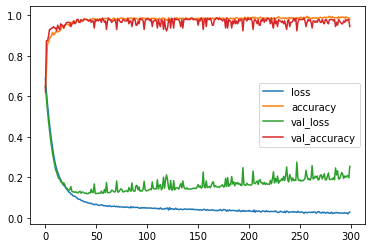

In [35]:
model_loss.plot()

In [66]:
pred_model = model.predict_classes(X_test)

C:\Users\USER\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [67]:
print("classification report:\n",classification_report(y_test,pred_model))
print("\n")

print("f1 score:\n",f1_score(y_test,pred_model))
print("\n")

print("confusion metrix:\n",confusion_matrix(y_test,pred_model))

classification report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        55
           1       0.99      0.92      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



f1 score:
 0.9529411764705882


confusion metrix:
 [[54  1]
 [ 7 81]]


In [36]:
#with early stopping point

In [37]:
model_early_stop = Sequential()
model_early_stop.add(Dense(30,activation='relu'))
model_early_stop.add(Dense(15,activation='relu'))
model_early_stop.add(Dense(1,activation='sigmoid'))
model_early_stop.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics='accuracy')

In [39]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [40]:
history_early = model_early_stop.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 44ms/step - loss: 0.6640 - accuracy: 0.7115 - val_loss: 0.6297 - val_accuracy: 0.7902
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6225 - accuracy: 0.7376 - val_loss: 0.5991 - val_accuracy: 0.7622
Epoch 3/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5889 - accuracy: 0.7412 - val_loss: 0.5585 - val_accuracy: 0.8252
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5498 - accuracy: 0.7919 - val_loss: 0.5179 - val_accuracy: 0.8531
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4988 - accuracy: 0.8931 - val_loss: 0.4727 - val_accuracy: 0.8671
Epoch 6/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4715 - accuracy: 0.8591 - val_loss: 0.4287 - val_accuracy: 0.8811
Epoch 7/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4206 - accuracy: 0.8793 - val_loss: 0.3850 - val_accuracy: 0.9161
Epoch 8

In [46]:
model_early_history = pd.DataFrame(history_early.history)

<AxesSubplot:>

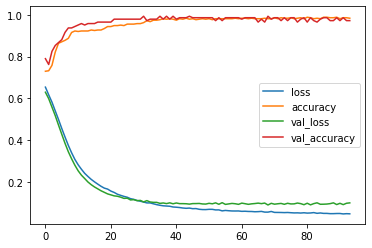

In [47]:
model_early_history.plot()

In [69]:
pred_earlystop = model_early_stop.predict_classes(X_test)

C:\Users\USER\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [70]:
print("classification report:\n",classification_report(y_test,pred_earlystop))
print("\n")

print("f1 score:\n",f1_score(y_test,pred_earlystop))
print("\n")

print("confusion metrix:\n",confusion_matrix(y_test,pred_earlystop))

classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



f1 score:
 0.9770114942528736


confusion metrix:
 [[54  1]
 [ 3 85]]


In [48]:
#adding dropout layers

In [49]:
model_dropout = Sequential()
model_dropout.add(Dense(30,activation='relu'))
model_dropout.add(Dropout(0.5))

model_dropout.add(Dense(15,activation='relu'))
model_dropout.add(Dropout(0.5))

model_dropout.add(Dense(1,activation='sigmoid'))
model_dropout.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics='accuracy')

In [50]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [51]:
history_drop = model_dropout.fit(X_train,y_train,verbose=1,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 44ms/step - loss: 0.7115 - accuracy: 0.5648 - val_loss: 0.6754 - val_accuracy: 0.7762
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6700 - accuracy: 0.6163 - val_loss: 0.6588 - val_accuracy: 0.8322
Epoch 3/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6556 - accuracy: 0.6736 - val_loss: 0.6314 - val_accuracy: 0.8811
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6338 - accuracy: 0.6775 - val_loss: 0.5928 - val_accuracy: 0.8322
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6055 - accuracy: 0.7316 - val_loss: 0.5617 - val_accuracy: 0.8182
Epoch 6/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6072 - accuracy: 0.7148 - val_loss: 0.5445 - val_accuracy: 0.8811
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5494 - accuracy: 0.7526 - val_loss: 0.5092 - val_accuracy: 0.8811
Epoch 8

14/14 [==============================] - 0s 10ms/step - loss: 0.1029 - accuracy: 0.9668 - val_loss: 0.0755 - val_accuracy: 0.9790
Epoch 116/600
14/14 [==============================] - 0s 11ms/step - loss: 0.1062 - accuracy: 0.9475 - val_loss: 0.0890 - val_accuracy: 0.9580
Epoch 117/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0891 - accuracy: 0.9649 - val_loss: 0.1066 - val_accuracy: 0.9580
Epoch 118/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0800 - accuracy: 0.9621 - val_loss: 0.0837 - val_accuracy: 0.9790
Epoch 119/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0943 - accuracy: 0.9615 - val_loss: 0.0784 - val_accuracy: 0.9720
Epoch 120/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0753 - accuracy: 0.9787 - val_loss: 0.0908 - val_accuracy: 0.9720
Epoch 121/600
14/14 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.96 - 0s 13ms/step - loss: 0.0763 - accuracy: 0.9708 - val_l

In [52]:
loss_dropout = pd.DataFrame(history_drop.history)

<AxesSubplot:>

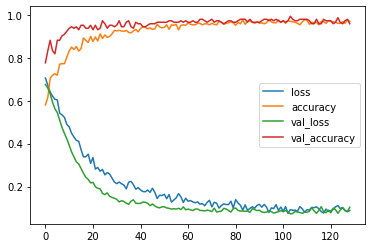

In [53]:
loss_dropout.plot()

In [54]:
#model evaluation

In [56]:
pred_drop = model_dropout.predict_classes(X_test)

C:\Users\USER\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [65]:
print("classification report:\n",classification_report(y_test,pred_drop))
print("\n")

print("f1 score:\n",f1_score(y_test,pred_drop))
print("\n")

print("confusion metrix:\n",confusion_matrix(y_test,pred_drop))

classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



f1 score:
 0.9651162790697674


confusion metrix:
 [[54  1]
 [ 5 83]]
